<div class="alert alert-info"> 
В одной директории с .ipynb воркбуком должны быть файлы: 
     <strong> Test (SQL + Python)-1.ipynb; </strong> 
     <strong> test2.xlsx; </strong> 
     <strong> titanic.csv; </strong> 
     <strong> Titanic_hist.png; </strong> 
     <strong> Titanic_SR.png; </strong> 
     <strong> Шаблон 101.docx. </strong> 
</div>

<div class="alert alert-danger"> Итоговый воркбук должен быть исполняем <strong> AS IS </strong> при наличии всех датасет файлов в директории. Фэйл исполнения == фэйл задания. </div>

# Подготовка

In [1]:
import os
import subprocess

os.system('python.exe -m pip install --upgrade pip')
version_cmd = 'python --version'
result = subprocess.check_output(version_cmd, shell=True, text=True)
py_version = result.split('.')
py_version = py_version[0][-1] + '.' + py_version[1]


! pip{py_version} install pandasql
! pip{py_version} install pandas
! pip{py_version} install openpyxl
! pip{py_version} install python-docx
! pip{py_version} install matplotlib
! pip{py_version} install seaborn

  Using cached pandasql-0.7.3.tar.gz (26 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.1 MB 2.2 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.1 MB 3.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 9.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/292.3 kB ? eta -:--:--
   ---------------------------------

In [2]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
# Проверь, что база загрузилась и читается
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


Это датафрейм "Титаник" с информацией о пассажирах на борту корабля:
- Survived = 1/0 (1 = выжил при крушении / 0 = нет)
- Pclass = класс, которым ехал пассажир (1 - наилучший)
- Name = имя пассажира
- Sex = пол пассажира
- Age = возраст пассажира
- Siblings/Spouses Aboard = Кол-во братьев/сестер/супругов на борту у пассажира
- Parents/Children Aboard = Кол-во родителей/детей на борту у пассажира
- Fare = стоимость билета

# SQL

In [5]:
# Проверь, что запрос выполняется и возвращает 487 записей

query = 'Select count(distinct Name) as nmb from df where Pclass = 3'

In [6]:
sqldf(query)

,nmb
0,487


Далее нужно написать запросы на SQL, которые отвечают на вопрос из задания

### Task 1

1.1. Есть ли выжившие пассажиры возрастом от 20 до 30 лет, одного пола, летевшие одним классом? 
Вывести группы и кол-во пассажиров в них

1.2. А есть ли выжившие пассажиры возрастом от 20 до 30 лет, одного пола, летевшие одним классом, у которых средняя стоимость билета отклоняется не более, чем на 10% от средней цены билета по всем пассажирам. 
Вывести группы, кол-во пассажиров в них, среднюю цену билета в группе и среднюю цену билета по всем пассажирам

In [7]:

task1 = 'SELECT Pclass, Sex, COUNT(*) as "Group Size" FROM df WHERE Age BETWEEN 20 AND 30 AND Survived = 1 GROUP BY Pclass, Sex'

sqldf(task1)

,Pclass,Sex,Group Size
0,1,female,21
1,1,male,10
2,2,female,25
3,2,male,2
4,3,female,30
5,3,male,20


1.2 Таких выживших нет. Первый код показывает сведения о пассажирах, которые выжили от 20 до 30 и среднюю цену по группам и в целом.

In [8]:
task12 = """
WITH AveragePrice AS (
SELECT AVG(Fare) as AvgPrice FROM df
)

SELECT Pclass, Sex, Count(*) as "Group Size", 
AVG(Fare) AS "Group Price",
ap.AvgPrice as "AVG Price"
FROM df CROSS JOIN AveragePrice ap
WHERE Age BETWEEN 20 and 30 AND 
Survived = 1 
GROUP BY Pclass, Sex

"""

sqldf(task12)

,Pclass,Sex,Group Size,Group Price,AVG Price
0,1,female,21,110.487300,32.30542
1,1,male,10,49.195840,32.30542
2,2,female,25,21.479168,32.30542
3,2,male,2,13.431250,32.30542
4,3,female,30,11.172500,32.30542
5,3,male,20,11.666665,32.30542


Данный код демонстрирует отсутствие групп, в которых средняя цена отличается не более, чем на 10% от средней цены среди всех пассажиров

In [9]:
task12 = """
WITH AveragePrice AS (
SELECT AVG(Fare) as AvgPrice FROM df
)

SELECT Pclass, Sex, Count(*) as "Group Size", 
AVG(Fare) AS group_price,
ap.AvgPrice as avg_price
FROM df CROSS JOIN AveragePrice ap
WHERE Age BETWEEN 20 and 30 AND 
Survived = 1 
GROUP BY Pclass, Sex
HAVING ABS(group_price - avg_price) / avg_price <=  0.1;
"""

sqldf(task12)

,Pclass,Sex,Group Size,group_price,avg_price


### Task 2

2. Сколько пассажиров летело в возрасте 0-19, 20-29, 30-39, 40-49 и 50+ лет каждого пола, 
посчитать долю каждой группы от общего числа пассажиров и среднюю стоимость билета для каждой группы? 
(округление может некорректно отрабатывать, оставить округление до целых)

'SQLite' при делении целых чисел отдаёт также целое число, поэтому для получения десятичной дроби, необходимо хотя бы 1 аргумент привести к типу с плавающей точкой (`REAL`).

In [10]:
task2 = """
WITH CountPassengers AS (
SELECT COUNT(*) as all_passengers 
FROM df
)

SELECT 
  Sex, AgeGroup, COUNT(*) AS "Group Size",
  ROUND(CAST(COUNT(*) AS REAL) / all_passengers * 100) AS percentage, 
  ROUND(AVG(Fare)) AS "AVG Price"

FROM (
      SELECT Sex, 
      CASE 
        WHEN Age < 20 THEN '0-19'
        WHEN Age < 30 THEN '20-29'
        WHEN Age < 40 THEN '30-39'
        WHEN Age < 50 THEN '40-49'
        ELSE '50+'
      END AS AgeGroup,
      Fare FROM df
      ) 
    AS subquery
    CROSS JOIN CountPassengers

GROUP BY Sex, AgeGroup
ORDER BY AgeGroup, Sex;
"""


sqldf(task2)

,Sex,AgeGroup,Group Size,percentage,AVG Price
0,female,0-19,89,10.0,34.0
1,male,0-19,110,12.0,26.0
2,female,20-29,92,10.0,35.0
3,male,20-29,201,23.0,18.0
4,female,30-39,68,8.0,54.0
5,male,30-39,131,15.0,28.0
6,female,40-49,42,5.0,59.0
7,male,40-49,72,8.0,32.0
8,female,50+,23,3.0,64.0
9,male,50+,59,7.0,35.0


### Task 3

3. Посчитать кол-во пассажиров, обращение к которым указано как "Mrs" и аналогично для "Miss". Вывести так же максимальный, минимальный и средний возраст для групп

In [11]:
task3 = """
WITH Prefix AS
(SELECT Name,
    CASE 
        WHEN Name LIKE 'Mrs%' THEN 'Mrs'
        WHEN Name LIKE 'Miss%' THEN 'Miss'
        ELSE NULL
    END AS prefix_type
FROM df
)

SELECT prefix_type as Prefix,
COUNT(*) as "Group Size", 
MAX(Age) as "Maximal age",
MIN(Age) as "Minimal age",
AVG(Age) as "AVG age"
FROM df JOIN Prefix on df.Name = Prefix.Name
WHERE prefix_type IS NOT NULL
GROUP BY  prefix_type
"""


sqldf(task3)

,Prefix,Group Size,Maximal age,Minimal age,AVG age
0,Miss,182,63.0,0.75,21.994505
1,Mrs,125,63.0,14.00,35.768000


# Python

In [12]:
file = 'test2.xlsx'
df = pd.read_excel(file, engine='openpyxl')

In [13]:
# Проверь, что база загрузилась и читается
df

,loan_id,app_status,reason
0,996,declined,Rule1
1,996,declined,Rule2
2,996,declined,Rule3
3,996,declined,Rule4
4,996,declined,Rule5
...,...,...,...
831,15,declined,Rule5
832,14,approved,NaN
833,8,approved,NaN
834,7,approved,NaN


Это датафрейм с заявками на кредит и решением для них: одобрить или отказать, а так же причина отказа.
- loan_id = номер заявки
- app_status = решение по заявке (одобрить или отказать)
- reason = номер причины отказа (по одной заявке может срабатывать несколько причин)

Далее нужно написать код на Python, которые отвечают на вопрос из задания

### Task 4

1. Посчитать Approval Rate (кол-во одобренных анкет ко всем) в % и вывести кол-во одобренных анкет (approved уникальны, decline - нет)
2. Посчитать кол-во отказных анкет и вывести % срабатывания каждого правила относительно всех отказов? Какие 3 правила чаще всего срабатывают в отказах?

In [14]:
all_requests = len(df)
approved = df[df['app_status'] == 'approved']

cnt_approved = len(approved)
percentage = (cnt_approved / all_requests) * 100

print(f"Approval Rate: {percentage:.1f}%")
print(f"Кол-во одобренных анкет: {cnt_approved}")

Approval Rate: 42.2%
Кол-во одобренных анкет: 353


In [15]:
def sort_func(index: pd.Index):
    res = []
    for rule in index:
        key = int(rule[rule.find('Rule') + 4:])
        res.append(key)

    return res

    
canceled = df[df['app_status'] == 'declined']

cnt_uniq_canceled = len(canceled.loan_id.unique())
cnt_all_canceled = len(canceled)
reasons = canceled.reason.value_counts().sort_index(key = sort_func)


print(f"Количество отказных анкет всего: {cnt_all_canceled}")
print(f"Количество уникальных отказных анкет (повторение правил не учитывается): {cnt_uniq_canceled}")

percentage = (reasons / cnt_all_canceled) * 100

for rule, percent in percentage.items():
    print(f"Правило {rule}: {percent:.1f}%")


Количество отказных анкет всего: 483
Количество уникальных отказных анкет (повторение правил не учитывается): 212
Правило Rule1: 7.7%
Правило Rule2: 9.7%
Правило Rule3: 10.6%
Правило Rule4: 10.4%
Правило Rule5: 11.8%
Правило Rule6: 11.4%
Правило Rule7: 11.0%
Правило Rule8: 11.0%
Правило Rule9: 7.9%
Правило Rule10: 8.5%
Правило Rule11: 0.2%


### Task 5

В датафрейме ниже лежат данные по клиентам и их задолженности:
- Numb = номер записи (= номер документа)
- Client = имя клиента
- OSZ = Сумма задолженности 
- peny = пени

In [16]:
df_docx = {
    'Numb':[102,103,104],
    'Client':['БББ.Б.Б','ВВВВВ.В','ГГ.Г.ГГ'],
    'OSZ':[1200000, 500000, 3000000],
    'peny':[1500,1000,2500]
}

In [17]:
df_docx = pd.DataFrame(df_docx)

In [18]:
df_docx

,Numb,Client,OSZ,peny
0,102,БББ.Б.Б,1200000,1500
1,103,ВВВВВ.В,500000,1000
2,104,ГГ.Г.ГГ,3000000,2500


В файле Шаблон.docx нужно заменить выделенные данные на данные датафрема выше и сохранить новые файлы (один файл - под каждую запись, исходный файл не затирать, сохранить форматирование сумм в рублях)

Неразрывный пробел обработать не получилось 

In [19]:
from docx import Document
import re


template_path = "Шаблон 101.docx"

def find_non_breaking_number(number, text):

    match = re.search(number, text)
    return match is not None

# Форматирование запятой даёт дробить числа по тысячам
def format_rub(amount):
    return f"{amount:,}".replace(",", " ")

def reformat_files(template, df):

    for _, row in df.iterrows():
        doc = Document(template)

        doc_num = '101'
        client_name = 'АААА. А. А.'
        amount_of_debt = r'1 000\u00A0000'
        penalties = r'1\u00A0000'

        for paragraph in doc.paragraphs:

            if doc_num in paragraph.text:
                paragraph.text = paragraph.text.replace(doc_num, str(row['Numb']))
            if client_name in paragraph.text:
                paragraph.text = paragraph.text.replace(client_name, row['Client'])

            if find_non_breaking_number(amount_of_debt, paragraph.text) \
                and find_non_breaking_number(penalties, paragraph.text):

                debt, penalty = paragraph.text.split(',')
                debt = re.sub(amount_of_debt, format_rub(row['OSZ']), debt)
                penalty = re.sub(penalties, format_rub(row['peny']), penalty)
                
                paragraph.text = f"{debt},{penalty}"

        new_file_path = f"Документ_{row['Numb']}.docx"
        doc.save(new_file_path)

reformat_files(template_path, df_docx)

### Task 6

Используя датасет titanic.csv создать визуализацию в виде нормированной гистограммы отражающую распределение выживших пассажиров (мужчин и женщин) по возрастам с шагом в 5 лет, при этом исключить из выборки тех кто старше 60 и тех кто младше 5. При этом на одну картинку вывести в т.ч. Total по выборке. 

Ответом будет служить картинка вида (+ python код который эту визуализацию строит):

C:\Users\slava\AppData\Local\Temp\ipykernel_12600\3931253998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['AgeGroup'] = pd.cut(filtered_data['Age'], bins=age_bins, right=False)
C:\Users\slava\AppData\Local\Temp\ipykernel_12600\3931253998.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_grouped = filtered_data[filtered_data['Survived'] == 1].groupby(['Sex', 'AgeGroup']).size().unstack(fill_value=0)
C:\Users\slava\AppData\Local\Temp\ipykernel_12600\3931253998.py:12: FutureWarning: The default of observed=False is deprecated and 

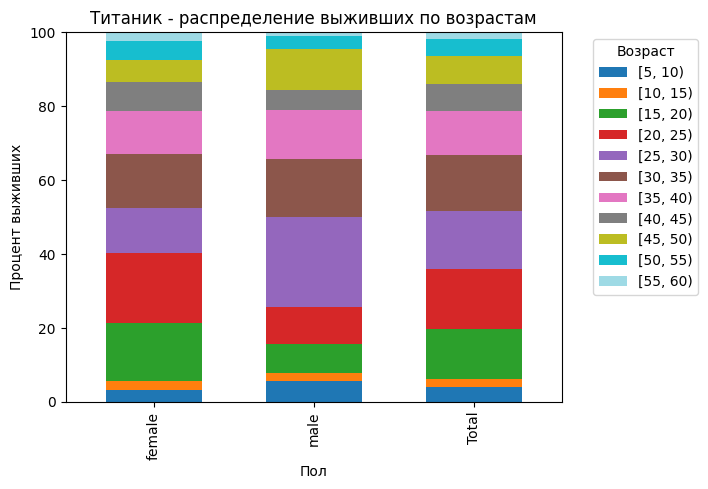

In [51]:
file_path = 'titanic.csv'
titanic_data = pd.read_csv(file_path)

filtered_data = titanic_data[(titanic_data['Age'] <= 60) & (titanic_data['Age'] >= 5)]
age_bins = range(5, 65, 5)

filtered_data['AgeGroup'] = pd.cut(filtered_data['Age'], bins=age_bins, right=False)

age_sex_grouped = filtered_data[filtered_data['Survived'] == 1].groupby(['Sex', 'AgeGroup']).size().unstack(fill_value=0)


total_grouped = filtered_data[filtered_data['Survived'] == 1].groupby(['AgeGroup']).size()
age_sex_grouped_norm = age_sex_grouped.div(age_sex_grouped.sum(axis=1), axis=0) * 100
total_grouped_norm = (total_grouped / total_grouped.sum()) * 100

combined_data = pd.concat([age_sex_grouped_norm.T, total_grouped_norm.rename('Total')], axis=1).T

fig, ax = plt.subplots()
combined_data.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', width=0.6)
ax.set_title('Титаник - распределение выживших по возрастам')
ax.set_xlabel('Пол')
ax.set_ylabel('Процент выживших')
ax.legend(title='Возраст', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([0, 1, 2], ['female', 'male', 'Total'])
plt.ylim(0, 100)
plt.show()

![Titanic](Titanic_hist.png) 

Используя датасет titanic.csv вывести таблцу Survival Rate для мужчин и для женщин старше 20 лет. Полученную таблицу записать в файл формата .xlsx.


Ответом будет служить .xlsx (+ python код который эту визуализацию строит) файл с записанным в него результатом:

In [67]:
file_path = 'titanic.csv'
df = pd.read_csv(file_path)

res = pd.DataFrame()
adults_df = df[df['Age'] > 20]

survival_counts = adults_df.groupby('Sex').agg({'Survived': ['sum', 'count']})

cnt_surv = survival_counts['Survived']['sum']
cnt_all = survival_counts['Survived']['count']

res['RIP'] = ((cnt_all - cnt_surv) / cnt_all) * 100
res['Survived'] = (cnt_surv / cnt_all) * 100
res['Total'] = '100%'
cnt_surv = adults_df['Survived'].sum()
cnt_all = adults_df['Survived'].count()
total_rip = ((cnt_all - cnt_surv) / cnt_all) * 100
total_surv = (cnt_surv / cnt_all) * 100

res.loc['Total'] = [total_rip, total_surv, '100%']

res = res.reset_index()

# Сохраняем таблицу в файл .xlsx
res.to_excel('survival_rate_by_gender.xlsx', index=False)

,Sex,RIP,Survived,Total
0,female,22.072072,77.927928,100%
1,male,82.844244,17.155756,100%
2,Total,62.556391,37.443609,100%


![Titanic_sr](Titanic_SR.png) 

### Task 7

Используя датасет построить корреляцию между возрастом, полом и Survival Rate'ом пассажиров титаника, визуализовать это в виде кривых и описать полученные результаты в виде краткой аналитической записки. 

C:\Users\slava\AppData\Local\Temp\ipykernel_12600\4055925154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data.groupby(['Sex'])['Age'].transform('median'), inplace=True)
C:\Users\slava\AppData\Local\Temp\ipykernel_12600\4055925154.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = data.groupby([

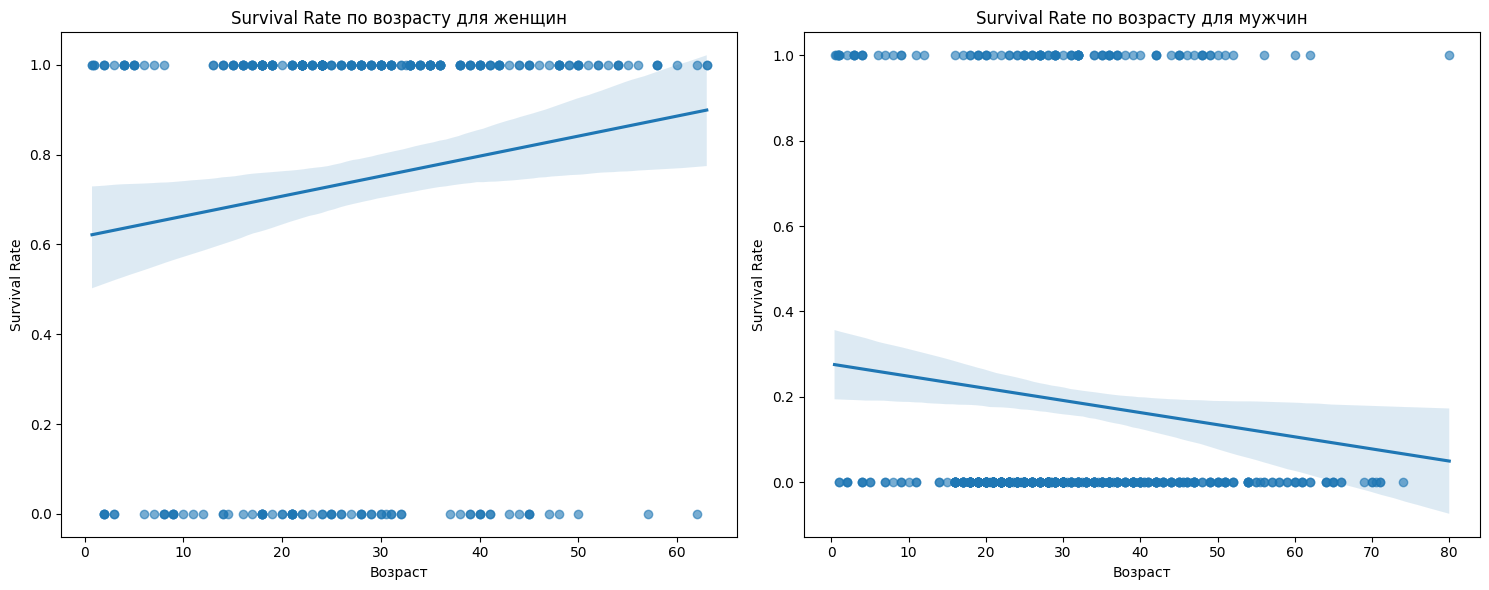

In [23]:
data = pd.read_csv('titanic.csv')
data['Age'].fillna(data.groupby(['Sex'])['Age'].transform('median'), inplace=True)


age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

survival_rates = data.groupby(['AgeGroup', 'Sex'])['Survived'].mean()
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Для женщин
sns.regplot(x="Age", y="Survived", data=data[data['Sex'] == 'female'], ax=axs[0], scatter_kws={'alpha': 0.6})
axs[0].set_title('Survival Rate по возрасту для женщин')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Survival Rate')

# Для мужчин
sns.regplot(x="Age", y="Survived", data=data[data['Sex'] == 'male'], ax=axs[1], scatter_kws={'alpha': 0.6})
axs[1].set_title('Survival Rate по возрасту для мужчин')
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()


Аналитическая записка:

1. Вероятность выживания женщин была значительно выше, чем у мужчин, во всех возрастных группах.
2. Вероятность выживания стабильно снижалась с возрастом, особенно это происходило акцентированно у мужчин.
3. Одна из самых высоких вероятностей выживания у группы детей от 0 до 10 лет
4. Можно заметить, что вероятность выживания женщин и детей всюду выше, это логично, исходя из того, что женщинам и детям всегда уступают, как слабому полу и возрасту, в котором только начинается жизнь.